# Imports

In [0]:
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt

# Loading Data
Calling load_data on this object will give you two sets of two lists, these will be the training and testing values for the graphics that contain the clothing items and their labels.

In [0]:
mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


# Show images with Matplotlib

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

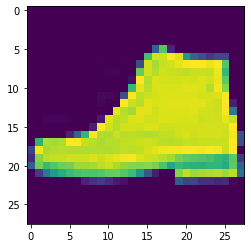

In [0]:
plt.imshow(train_images[42])
print(train_labels[0])
print(train_images[0])

# Normalize Data
Better to keep data between 0 & 1, so divide all numbers by 255

In [0]:
train_images  = train_images / 255.0
test_images = test_images / 255.0

# Design Model

In [0]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

**Sequential**: That defines a SEQUENCE of layers in the neural network

**Flatten**: Flatten just takes that image square and turns it into a 1 dimensional set.

**Dense**: Adds a layer of neurons

Each layer of neurons need an activation function to tell them what to do. 

**Relu** effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

**Softmax** takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!

# Build the Model & Train 
Compile it and optimize the loss function

In [0]:
model.compile(optimizer = tf.train.AdamOptimizer(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 93us/sample - loss: 0.5051 - acc: 0.8227
Epoch 2/5
60000/60000 [==============================] - 4s 75us/sample - loss: 0.3755 - acc: 0.8634
Epoch 3/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.3379 - acc: 0.8779
Epoch 4/5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.3134 - acc: 0.8851
Epoch 5/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2945 - acc: 0.8912


# Evaluate

In [0]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 36us/sample - loss: 0.3545 - acc: 0.8743


[0.35447415935993193, 0.8743]